In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adarsh0806/ab-testing-practice")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ab-testing-practice' dataset.
Path to dataset files: /kaggle/input/ab-testing-practice


In [13]:
import os

data_path = "/root/.cache/kagglehub/datasets/adarsh0806/ab-testing-practice/versions/1"
os.listdir(data_path)

['ab_testing.csv']

In [16]:
file_path = os.path.join(data_path, 'ab_testing.csv')
df = pd.read_csv(file_path)

# Quick peek at the data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB
None


,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [17]:
# Preprocess

df['Conversion'] = df['Conversion'].map({'Yes': 1, 'No': 0})

In [18]:
df['Group'].value_counts()

,count
Group,
A,2519
B,2481


In [19]:
df.groupby('Group')['Conversion'].mean()

,Conversion
Group,
A,0.053990
B,0.140669


Hypothesis Testing

The main A/B test question is:

Null hypothesis (H0): Conversion rate of Group A = Conversion rate of Group B

Alternative hypothesis (H1): Conversion rate of Group B ≠ Conversion rate of Group A

Testing using a two-proportion z-test.

In [27]:
from statsmodels.stats.proportion import proportions_ztest

convert_a = df[df['Group']=='A']['Conversion'].sum()
convert_b = df[df['Group']=='B']['Conversion'].sum()
n_a = df[df['Group']=='A'].shape[0]
n_b = df[df['Group']=='B'].shape[0]

count = [convert_a, convert_b]
nobs = [n_a, n_b]

stat, pval = proportions_ztest(count, nobs)
print(f"Z-stat: {stat}, p-value: {pval}")
print(f"Z-stat: {stat: .6f}, p-value: {pval: .30f}")

Z-stat: -10.354488520266216, p-value: 3.9931511894201938e-25
Z-stat: -10.354489, p-value:  0.000000000000000000000000399315


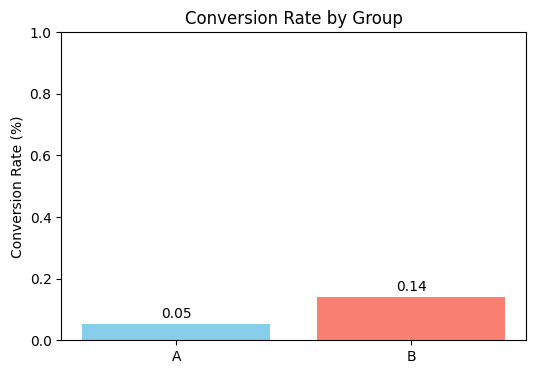

In [37]:
# Compute conversion rates
conversion_summary = df.groupby('Group')['Conversion'].apply(lambda x: (x==1).mean())

# Plot
plt.figure(figsize=(6,4))
plt.bar(conversion_summary.index, conversion_summary.values, color=['skyblue', 'salmon'])
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, 1)
for i, v in enumerate(conversion_summary.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
plt.show()


<Figure size 600x400 with 0 Axes>

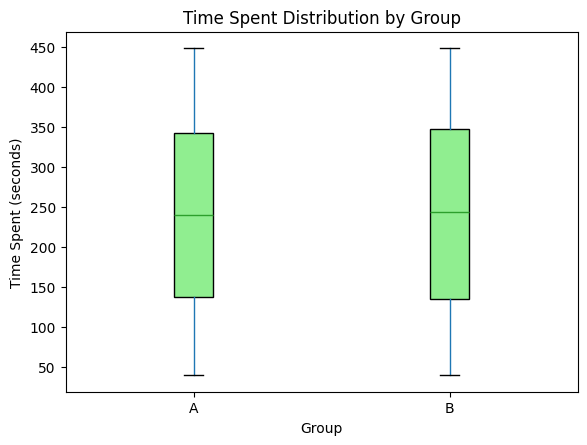

<Figure size 600x400 with 0 Axes>

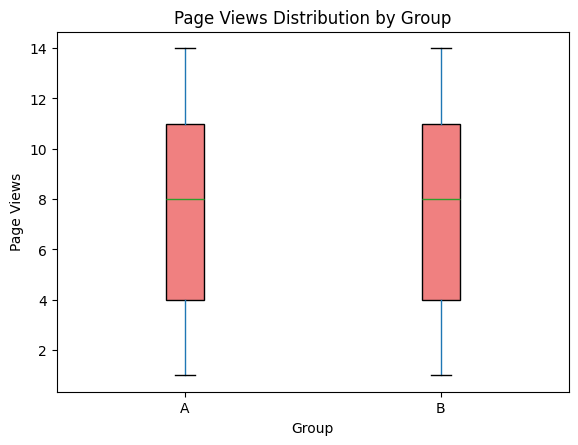

In [34]:
# Time Spent
plt.figure(figsize=(6,4))
df.boxplot(column='Time Spent', by='Group', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'))
plt.title("Time Spent Distribution by Group")
plt.suptitle("")  # Remove automatic subtitle
plt.ylabel("Time Spent (seconds)")
plt.show()

# Page Views
plt.figure(figsize=(6,4))
df.boxplot(column='Page Views', by='Group', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightcoral'))
plt.title("Page Views Distribution by Group")
plt.suptitle("")
plt.ylabel("Page Views")
plt.show()

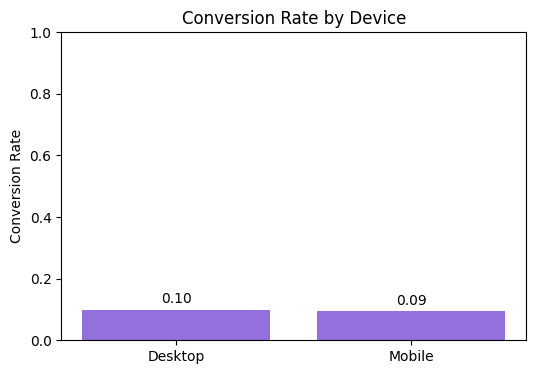

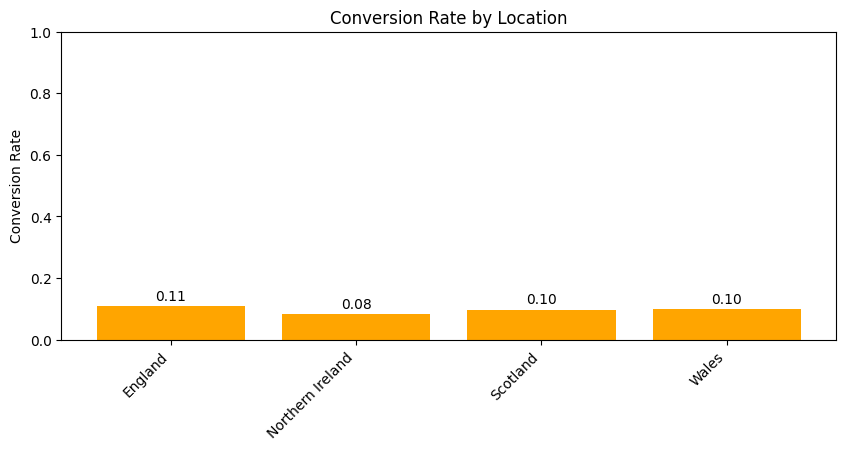

In [36]:
# Conversion by Device
device_summary = df.groupby('Device')['Conversion'].apply(lambda x: (x==1).mean())
plt.figure(figsize=(6,4))
plt.bar(device_summary.index, device_summary.values, color='mediumpurple')
plt.title("Conversion Rate by Device")
plt.ylabel("Conversion Rate")
plt.ylim(0, 1)
for i, v in enumerate(device_summary.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# Conversion by Location
location_summary = df.groupby('Location')['Conversion'].apply(lambda x: (x==1).mean())
plt.figure(figsize=(10,4))
plt.bar(location_summary.index, location_summary.values, color='orange')
plt.title("Conversion Rate by Location")
plt.ylabel("Conversion Rate")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(location_summary.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()